In [1]:
#pandas, NumPy, Matplotlib, and scikit-learn’s Isolation forest class

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest 


In [3]:
dftrain = pd.read_csv("train.csv")
df.head()

,mean,sd
0,0.564877,0.231592
1,-0.118285,0.020446
2,-0.157953,-0.106749
3,-0.157953,-0.106749
4,-0.157953,-0.106242


In [4]:
dftest = pd.read_csv("test.csv")
dftest.head()

,mean,sd
0,-0.157953,-0.106749
1,-0.157953,-0.106749
2,-0.157953,-0.106242
3,-0.284889,-0.106749
4,-0.157953,-0.106242


In [52]:
X_train = dftrain
clf = IsolationForest(contamination=0.001,max_samples='auto', random_state=16, max_features=1.0)
clf.fit(X_train)


/usr/local/lib/python3.7/site-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


IsolationForest(contamination=0.001, random_state=16)

/usr/local/lib/python3.7/site-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


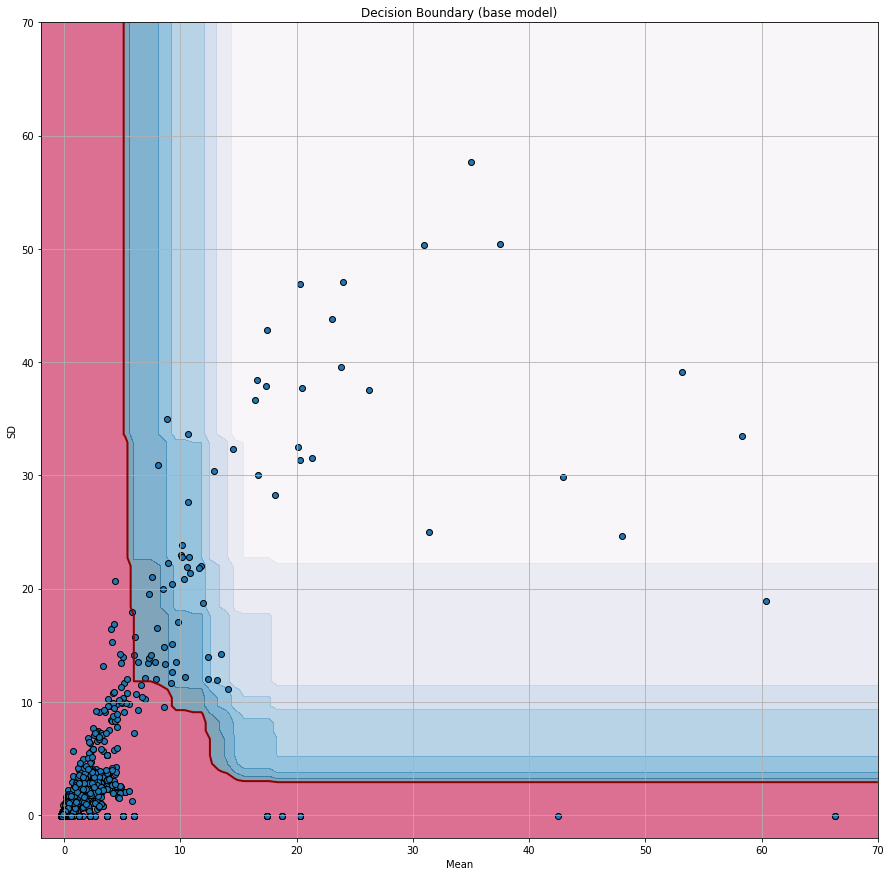

In [53]:
import matplotlib.pyplot as plt

# Change the plot's size.
plt.rcParams['figure.figsize'] = [15, 15]

# Plot of the decision frontier
xx, yy = np.meshgrid(np.linspace(-2, 70, 100), np.linspace(-2, 70, 100))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.title("Decision Boundary (base model)")
# This draw the "soft" or secondary boundaries.
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 8), cmap=plt.cm.PuBu, alpha=0.5)
# This draw the line that separates the hard from the soft boundaries.
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
# This draw the hard boundary
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')
plt.scatter(X_train.iloc[:, 0],
            X_train.iloc[:, 1],
            edgecolors='k')
plt.xlabel('Mean')
plt.ylabel('SD')
plt.grid(True)
plt.show()

In [93]:
X_test=dftest
test_predictions = clf.predict(dftest)
X_test['predictions'] = test_predictions
X_test

,mean,sd,predictions
0,-0.157953,-0.106749,1
1,-0.157953,-0.106749,1
2,-0.157953,-0.106242,1
3,-0.284889,-0.106749,1
4,-0.157953,-0.106242,1
...,...,...,...
16052,-0.157953,-0.106242,1
16053,-0.157953,-0.106242,1
16054,-0.038950,0.020446,1
16055,-0.157953,-0.106242,1


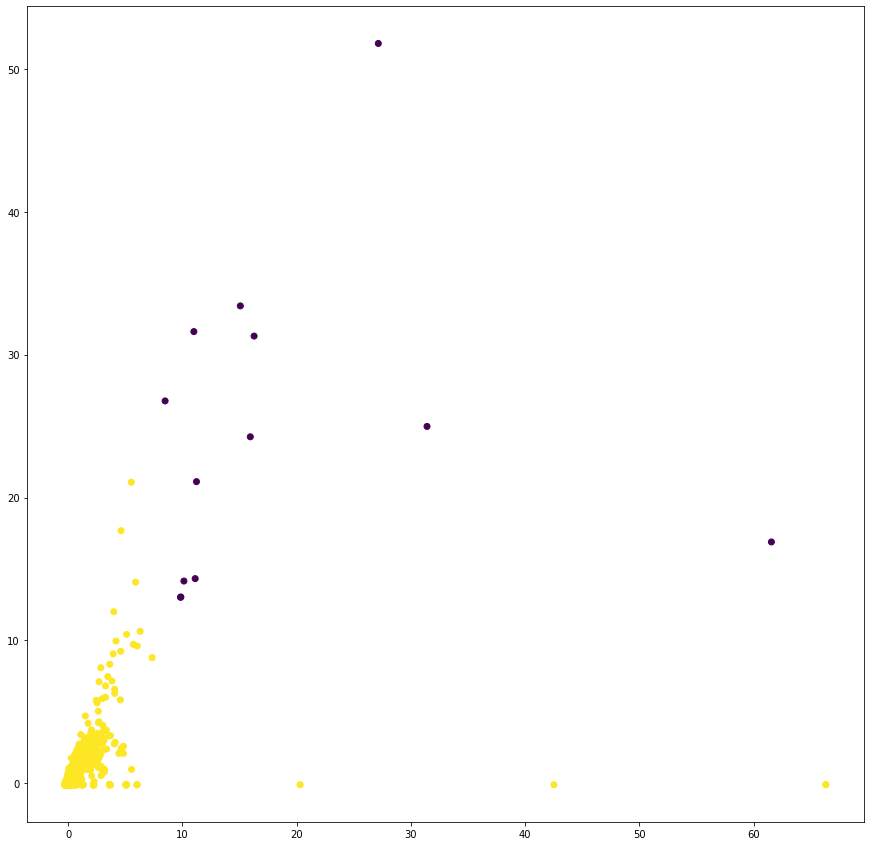

In [98]:
plt.scatter(X_test["mean"], X_test["sd"], c=X_test['predictions'])

In [104]:
import joblib
joblib.dump(clf,"model.joblib") 

['model.joblib']

In [106]:
mj = joblib.load("model.joblib")
mj.predict(dftrain)

array([1, 1, 1, ..., 1, 1, 1])